In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/Suhas/Desktop/crop_production.csv')
df = df[df['State_Name'] == "Karnataka"]
df['Yield'] = df['Production']/df['Area']
df = df.drop('Area', axis=1)
df = df.drop('Production', axis=1)
df["District_Name"].unique()

array(['BAGALKOT', 'BANGALORE RURAL', 'BELGAUM', 'BELLARY',
       'BENGALURU URBAN', 'BIDAR', 'BIJAPUR', 'CHAMARAJANAGAR',
       'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD',
       'DAVANGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI',
       'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR',
       'RAMANAGARA', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD',
       'YADGIR'], dtype=object)

In [3]:
# for i in df['Crop'].unique():
#     if len(df[df['Crop']==i]['Season'].unique())==4:
#         print(i)
        

In [4]:
data = df.dropna()
data1 = data.drop(["State_Name"],axis=1)
print(data1.shape)

(21079, 5)


In [5]:
data_dum = pd.get_dummies(data1)
data_dum.columns = data_dum.columns.str.strip()
data_dum[:5]

,Crop_Year,Yield,District_Name_BAGALKOT,District_Name_BANGALORE RURAL,District_Name_BELGAUM,District_Name_BELLARY,District_Name_BENGALURU URBAN,District_Name_BIDAR,District_Name_BIJAPUR,District_Name_CHAMARAJANAGAR,...,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Wheat
76865,1998,0.422814,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76866,1998,1.072050,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76867,1998,0.859155,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76868,1998,1.453465,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76869,1998,0.472507,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x = data_dum.drop("Yield",axis=1)
y = data_dum[["Yield"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (14755, 94)
x_test : (6324, 94)
y_train : (14755, 1)
y_test : (6324, 1)


In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train.values.ravel())

In [10]:
preds = model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
# mean_squared_error(y_test,preds)
# r2_score(y_test,preds)
z=y_test
z['Prediction']=preds
z

<ipython-input-10-fc86ab92dbf7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Prediction']=preds


,Yield,Prediction
80795,0.217391,0.218413
93629,0.530328,0.592447
83631,114.000000,104.718742
93248,2.022854,2.254897
79734,1.321169,1.426237
...,...,...
85840,0.963268,1.149613
91339,10.366584,10.443634
82839,0.418968,0.360244
88786,0.590884,0.471066


In [11]:
print("r2 score",r2_score(y_test.drop("Prediction",axis=1),preds))
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
print(sqrt(mean_squared_error(z["Yield"], preds)))
print(sqrt(mean_squared_error(y_train, model.predict(x_train))))

r2 score 0.9692312591711125
2.319581509723061
0.8206479829075334


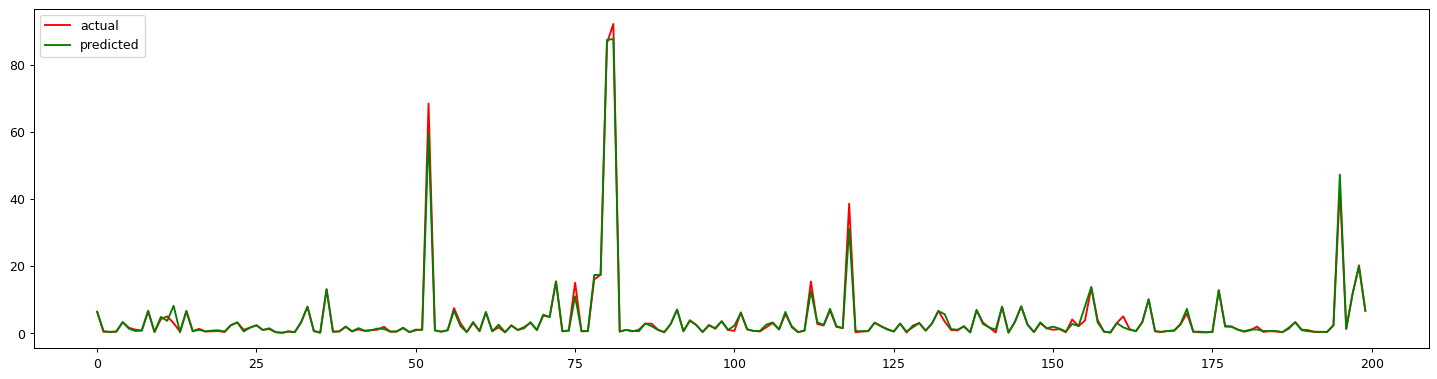

In [14]:
from matplotlib.pyplot import figure

figure(figsize=(20, 5), dpi=90)
n=np.arange(0,200)
plt.plot(n,z['Yield'][50:250],color="red")
plt.get_current_fig_manager().full_screen_toggle()
# plt.show()
# figure(figsize=(20, 6), dpi=90)
plt.plot(n,z['Prediction'][50:250],color="green")
plt.legend(["actual", "predicted"], loc="upper left")
plt.show()

In [55]:
def cropYield():
    district = "BAGALKOT"
    year = 2022
    season = "Kharif"
    crop = "Bajra"
    area = 100
    import joblib
#     model1 = joblib.load('C:/Users/Suhas/Downloads/cropYield.pkl')

    column_names=['Crop_Year', 'District_Name_BAGALKOT', 'District_Name_BANGALORE RURAL',
       'District_Name_BELGAUM', 'District_Name_BELLARY',
       'District_Name_BENGALURU URBAN', 'District_Name_BIDAR',
       'District_Name_BIJAPUR', 'District_Name_CHAMARAJANAGAR',
       'District_Name_CHIKBALLAPUR', 'District_Name_CHIKMAGALUR',
       'District_Name_CHITRADURGA', 'District_Name_DAKSHIN KANNAD',
       'District_Name_DAVANGERE', 'District_Name_DHARWAD',
       'District_Name_GADAG', 'District_Name_GULBARGA', 'District_Name_HASSAN',
       'District_Name_HAVERI', 'District_Name_KODAGU', 'District_Name_KOLAR',
       'District_Name_KOPPAL', 'District_Name_MANDYA', 'District_Name_MYSORE',
       'District_Name_RAICHUR', 'District_Name_RAMANAGARA',
       'District_Name_SHIMOGA', 'District_Name_TUMKUR', 'District_Name_UDUPI',
       'District_Name_UTTAR KANNAD', 'District_Name_YADGIR', 'Season_Kharif',
       'Season_Rabi', 'Season_Summer', 'Season_Whole Year',
       'Crop_Arcanut (Processed)', 'Crop_Arecanut', 'Crop_Arhar/Tur',
       'Crop_Atcanut (Raw)', 'Crop_Bajra', 'Crop_Banana',
       'Crop_Beans & Mutter(Vegetable)', 'Crop_Black pepper', 'Crop_Brinjal',
       'Crop_Cardamom', 'Crop_Cashewnut', 'Crop_Cashewnut Processed',
       'Crop_Cashewnut Raw', 'Crop_Castor seed', 'Crop_Citrus Fruit',
       'Crop_Coconut', 'Crop_Coriander', 'Crop_Cotton(lint)',
       'Crop_Cowpea(Lobia)', 'Crop_Dry chillies', 'Crop_Dry ginger',
       'Crop_Garlic', 'Crop_Gram', 'Crop_Grapes', 'Crop_Groundnut',
       'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Linseed', 'Crop_Maize',
       'Crop_Mango', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Niger seed',
       'Crop_Onion', 'Crop_Other  Rabi pulses', 'Crop_Other Fresh Fruits',
       'Crop_Other Kharif pulses', 'Crop_Paddy', 'Crop_Papaya',
       'Crop_Peas & beans (Pulses)', 'Crop_Pome Fruit', 'Crop_Potato',
       'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean',
       'Crop_Sugarcane', 'Crop_Sunflower', 'Crop_Sweet potato', 'Crop_Tapioca',
       'Crop_Tobacco', 'Crop_Tomato', 'Crop_Turmeric', 'Crop_Urad',
       'Crop_Wheat']

    df = pd.DataFrame(columns = column_names)
    df = df.append({'Crop_Year': year, ('District_Name_'+district.upper()): 1, ('Season_'+season): 1, ('Crop_'+crop):1}, ignore_index = True)
    df = df.fillna(0)
#     print(df.iloc[0])
    pred=model.predict([df.iloc[0]])
    return {'prediction': pred}
print(cropYield()['prediction'])

[1.04294638]


In [54]:
import joblib
joblib.dump(model,'cropYield.pkl',compress=3)

['cropYield.pkl']